Description

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 1 = normal; 2 = fixed defect; 3 = reversable defect

target - have disease or not (1=yes, 0=no)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np 
import seaborn as sns
sns.set_theme(style="darkgrid")
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

# Heart Disease

## EDA

In [2]:
#%% Data Load
df = pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')

print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

In [4]:
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
print(df['sex'].value_counts())

1    207
0     96
Name: sex, dtype: int64


In [6]:
print(df['target'].value_counts())

1    165
0    138
Name: target, dtype: int64


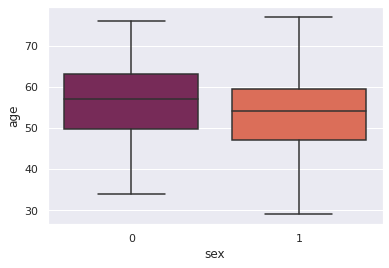

In [7]:
#%% Age-Sex Box Plot

age_sex_box = sns.boxplot(y='age', data = df, palette= 'rocket', x = 'sex' )

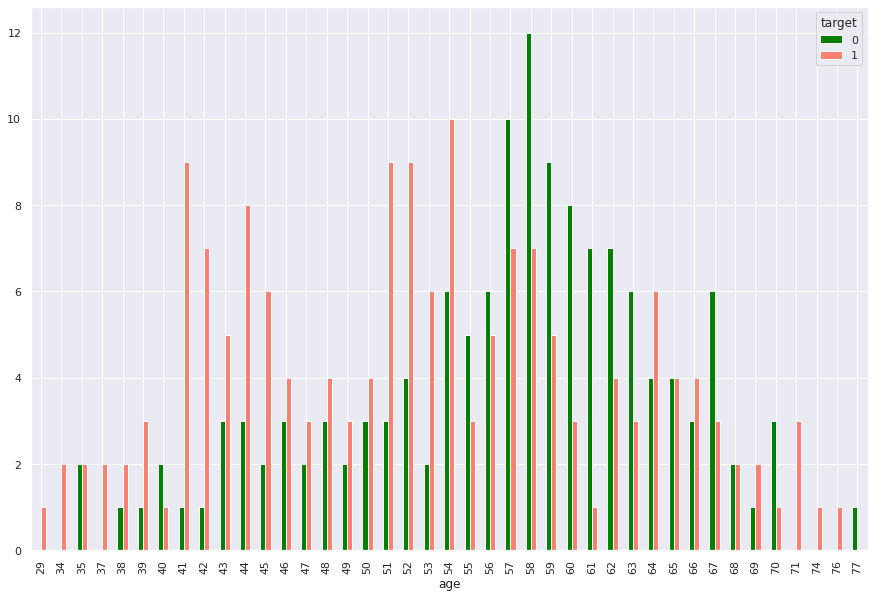

In [8]:
#%% Age-Target Bar Plot

age_target = pd.crosstab(df['age'],df['target']).plot(figsize=(15,10), kind = 'bar', color =('green','salmon'))

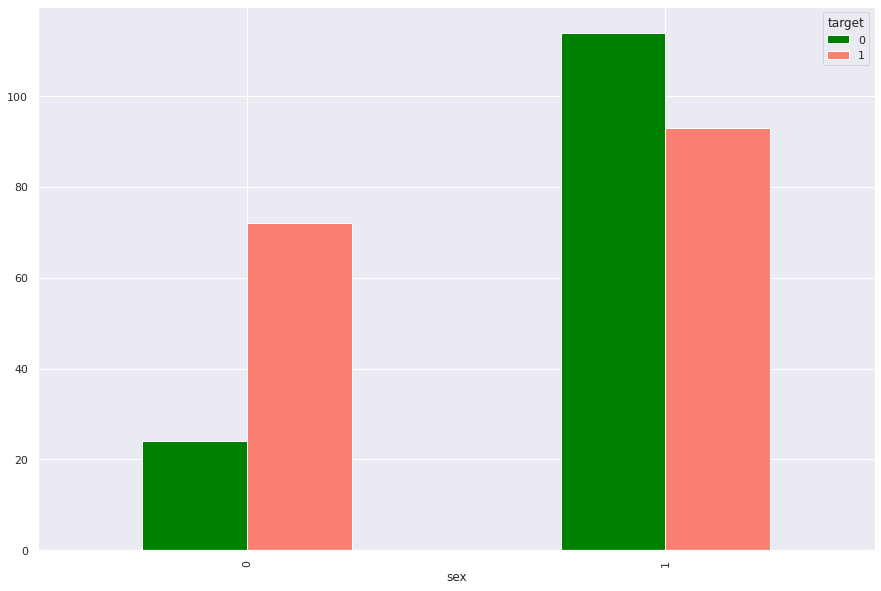

In [9]:
#%% Sex-Target Bar Plot

sex_target = pd.crosstab(df['sex'],df['target']).plot(figsize=(15,10), kind = 'bar', color =('green','salmon'))

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

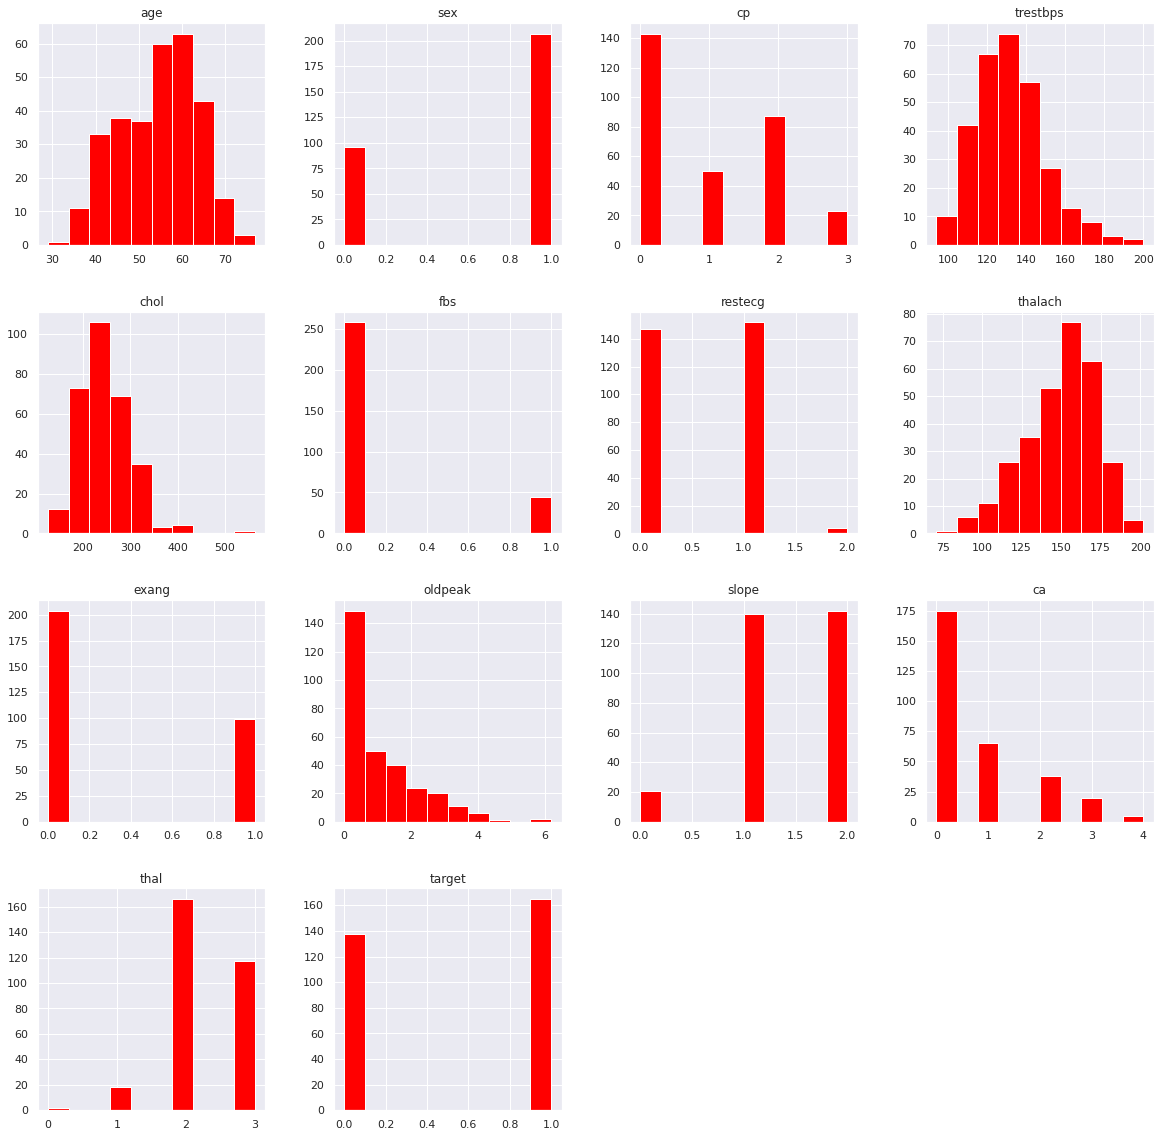

In [10]:
#%% Distributions of Variables

df.hist(figsize=(20,20), color = 'red')

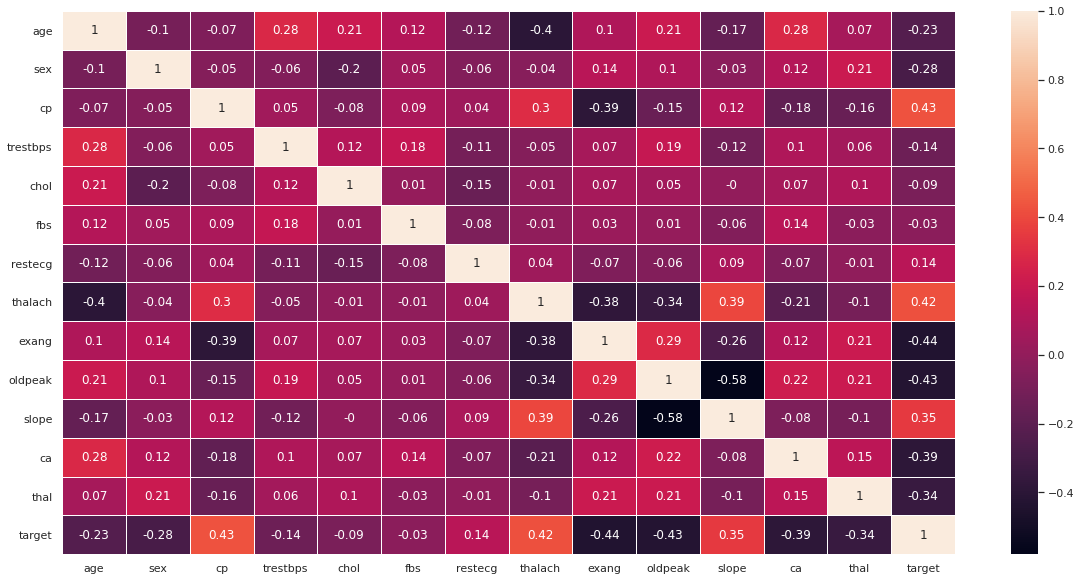

In [11]:
#%% Correlation Plot

plt.figure(figsize = (20,10))
sns.heatmap(data=df.corr().round(2), linewidths=.5, annot=True, annot_kws={"size":12})
plt.show()

## Classification

### Preprocessing

In [12]:
#%% SCALING DATA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
print(df_scaled.head())

        age       sex        cp  trestbps      chol       fbs   restecg  \
0  0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1 -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2 -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3  0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4  0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   

    thalach     exang   oldpeak     slope        ca      thal    target  
0  0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873  0.914529  
1  1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922  0.914529  
2  0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922  0.914529  
3  1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922  0.914529  
4  0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922  0.914529  


In [13]:
#%% Train and Test Set 

X = df_scaled.drop(['target'], axis = 1)
y = df['target']


In [14]:
#%% Train and Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.30, random_state = 123)
print(X_train.shape, X_test.shape)

(212, 13) (91, 13)


### Naive Bayes

In [15]:
#%% Naive Bayes model and metrics 

from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        45
           1       0.81      0.83      0.82        46

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

[[36  9]
 [ 8 38]]


<AxesSubplot:>

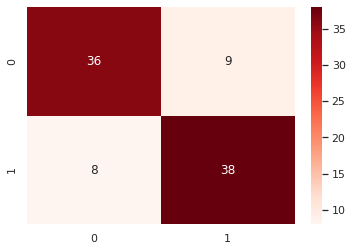

In [16]:
#%% Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

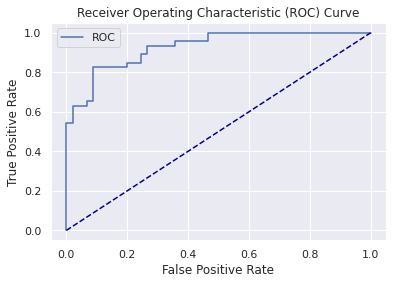

AUC: 0.93


In [17]:
#%% ROC Curve

y_probs = model.predict_proba(X_test)

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Decision Tree

In [18]:
#%% Decision Tree model and metrics 

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(min_samples_leaf = 8, min_samples_split = 3)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81        45
           1       0.80      0.87      0.83        46

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91

[[35 10]
 [ 6 40]]


<AxesSubplot:>

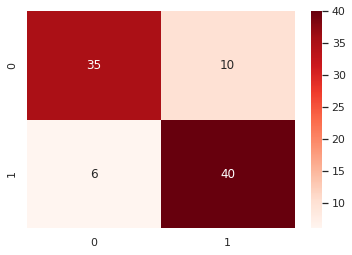

In [19]:
#%% Confusion Matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

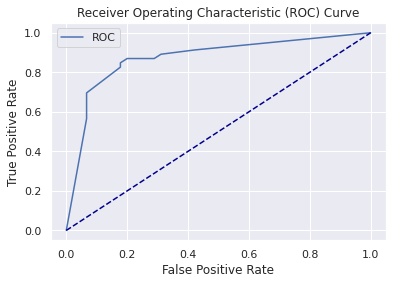

AUC: 0.87


In [20]:
#%% ROC Curve

y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### KNN

In [21]:
#%% KNN Classifier 

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors= 5)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.82      0.83        45
           1       0.83      0.85      0.84        46

    accuracy                           0.84        91
   macro avg       0.84      0.84      0.84        91
weighted avg       0.84      0.84      0.84        91

[[37  8]
 [ 7 39]]


<AxesSubplot:>

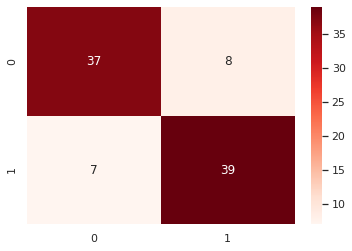

In [22]:
#%% Confusion Matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

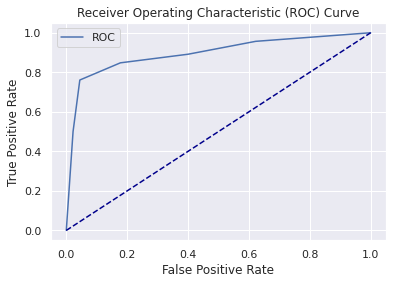

AUC: 0.89


In [23]:
#%% ROC Curve

y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

### Multi-Layer Perceptron

In [24]:
#%% Multi-layer model and metrics

from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes= 50, max_iter= 200, alpha = 0.9)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.73      0.78        45
           1       0.76      0.85      0.80        46

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91

[[33 12]
 [ 7 39]]


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<AxesSubplot:>

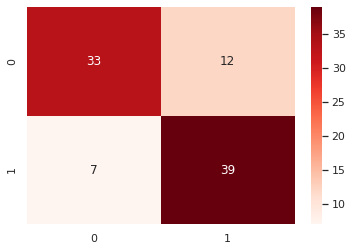

In [25]:
#%% Confusion Matrix


sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds")

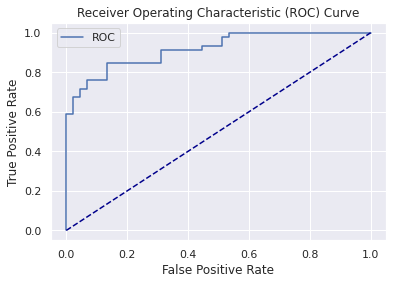

AUC: 0.92


In [26]:
#%% ROC Curve

y_probs = model.predict_proba(X_test) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)